# 多層感知器 (Multi-layer Perceptron)

## 1-加載 Library

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
e:\code\python\virtual\venv36_dl\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
e:\code\python\virtual\venv36_dl\lib\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
e:\code\python\virtual\venv36_dl\lib\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
e:\code\python\virtual\venv36_dl\lib\site-packages\tenso

## 2-數據集處理

In [2]:
# 回傳值: ((訓練特徵, 訓練目標), (測試特徵, 測試目標))
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
import pandas as pd
# 為了顯示的漂亮, 我刻意的把印出來的 row 只顯示 15 個和 column 只顯示 10 個
# 大家練習的時候可以去掉下面兩行
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)
pd.DataFrame(x_train[0])

,0,1,2,3,4,...,23,24,25,26,27
0,0,0,0,0,0,...,0,0,0,0,0
1,0,0,0,0,0,...,0,0,0,0,0
2,0,0,0,0,0,...,0,0,0,0,0
3,0,0,0,0,0,...,0,0,0,0,0
4,0,0,0,0,0,...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
23,0,0,0,0,55,...,0,0,0,0,0
24,0,0,0,0,136,...,0,0,0,0,0
25,0,0,0,0,0,...,0,0,0,0,0
26,0,0,0,0,0,...,0,0,0,0,0


In [4]:
from keras.utils import np_utils
# reshape 讓他從 32 * 32 變成 784 * 1 的一維陣列
# 除以 255 讓我們標準化到 0-1 區間
x_train_shaped = x_train.reshape(60000, 784).astype("float32") / 255
x_test_shaped = x_test.reshape(10000, 784).astype("float32") / 255
# keras 要求你的分類輸出必須換成 One-hot 模式
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)
print("One-hot 前:", y_train[0])
print("One-hot 後:", y_train_cat[0])

One-hot 前: 5
One-hot 後: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 3-建立模型(Non-Linear SVM)

In [5]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
h_layer = Dense(units = 256,
input_dim = 784,
kernel_initializer = "random_normal",
activation = "relu")
model.add(h_layer)
o_layer = Dense(units = 10,
kernel_initializer = "random_normal",
activation = "softmax")
model.add(o_layer)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


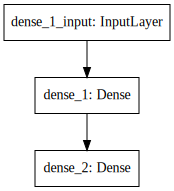

In [6]:
# 需要安裝(pip install pydotplus)
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [7]:
model.compile(loss="categorical_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy'])

In [8]:
train_history = model.fit(x = x_train_shaped, y = y_train_cat,
                          validation_split = 0.1,
                          epochs = 10,
                          batch_size = 200,
                          verbose = 2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 5s - loss: 0.4171 - acc: 0.8880 - val_loss: 0.1824 - val_acc: 0.9512
Epoch 2/10
 - 2s - loss: 0.1845 - acc: 0.9473 - val_loss: 0.1239 - val_acc: 0.9672
Epoch 3/10
 - 3s - loss: 0.1292 - acc: 0.9631 - val_loss: 0.1040 - val_acc: 0.9695
Epoch 4/10
 - 2s - loss: 0.0985 - acc: 0.9723 - val_loss: 0.0902 - val_acc: 0.9723
Epoch 5/10
 - 3s - loss: 0.0769 - acc: 0.9784 - val_loss: 0.0827 - val_acc: 0.9753
Epoch 6/10
 - 3s - loss: 0.0622 - acc: 0.9822 - val_loss: 0.0779 - val_acc: 0.9788
Epoch 7/10
 - 3s - loss: 0.0512 - acc: 0.9857 - val_loss: 0.0827 - val_acc: 0.9758
Epoch 8/10
 - 3s - loss: 0.0420 - acc: 0.9879 - val_loss: 0.0762 - val_acc: 0.9773
Epoch 9/10
 - 3s - loss: 0.0342 - acc: 0.9910 - val_loss: 0.0681 - val_acc: 0.9795
Epoch 10/10
 - 25s - loss: 0.0281 - acc: 0.9930 - val_loss: 0.0671 - val_acc: 0.9812


## 4-繪圖(Non-Linear SVM)的決策邊界

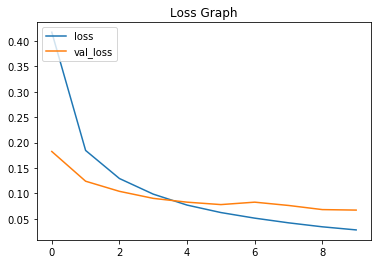

In [9]:
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["val_loss"])
plt.title("Loss Graph")
plt.legend(['loss', 'val_loss'], loc="upper left")

## 5-模型準確率分析

In [10]:
pre = model.predict_classes(x_test_shaped)
print("預測標籤:", list(pre[:5]))
print("正確標籤:", list(y_test)[:5])

預測標籤: [7, 2, 1, 0, 4]
正確標籤: [7, 2, 1, 0, 4]


In [11]:
e = model.evaluate(x_test_shaped, y_test_cat)
print("衡量係數:", e)
print("正確率:", e[1] * 100, "%")

10000/10000 [==============================] - 1s 62us/step
衡量係數: [0.06763841632034163, 0.9797]
正確率: 97.97 %


In [12]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,968,1,2,1,2,1,3,1,1,0
1,0,1123,4,0,0,1,3,0,4,0
2,3,2,1015,2,1,0,2,3,4,0
3,0,0,6,990,0,3,0,3,5,3
4,0,0,4,1,964,0,3,1,1,8
5,2,0,0,6,1,874,3,1,4,1
6,3,2,3,1,3,2,944,0,0,0
7,0,3,12,2,0,0,0,1003,3,5
8,4,0,8,2,3,2,3,3,946,3
9,3,5,0,8,10,2,1,7,3,970
